<a href="https://colab.research.google.com/github/tyu719/TestUpload/blob/master/homework6_tyu29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import packages


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

load data

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
dat = pd.read_csv("/content/drive/My Drive/shhs1.txt", delimiter="\t")
dat.head(5)

,pptid,waist,COPD15,ASTHMA15,slp_lat,time_bed,timest1p,timest2p,times34p,timeremp,rdi4p,StLOutP,StOnsetP,SlpPrdP,Staging1,Staging2,Staging3,Staging4,Staging5,RestAn1,RestAn2,RestAn3,RestAn4,HTNDerv_s1,shhs1_tcvd,gender,age_s1,smokstat_s1,WASO,bmi_s1
0,1,86.0,0.0,0.0,NaN,440.5,6.258322,60.852196,19.307590,13.581891,1.438083,28,28,375.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,1,55,2.0,65.0,21.777553
1,2,107.0,0.0,0.0,NaN,225.0,0.824176,65.659340,16.758242,16.758242,17.802198,0,0,182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,78,0.0,43.0,32.950680
2,3,82.0,0.0,0.0,NaN,431.5,4.881451,40.306835,42.817295,11.994421,4.853556,167,167,358.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,77,0.0,73.0,24.114150
3,4,85.0,0.0,0.0,14.0,358.5,2.990033,29.401993,52.325581,15.282393,0.797342,54,82,301.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,48,0.0,43.5,20.185185
4,5,76.0,0.0,0.0,6.5,477.0,5.675676,68.648651,13.378378,12.297297,2.756757,7,20,370.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,66,2.0,100.5,23.309053


Fit a linear model

In [11]:
fit = smf.ols('np.log(rdi4p + 1) ~ bmi_s1', data = dat).fit()
fit.summary()

-0.4630414022771115

Scatter plot of log(rdi4p + 1)

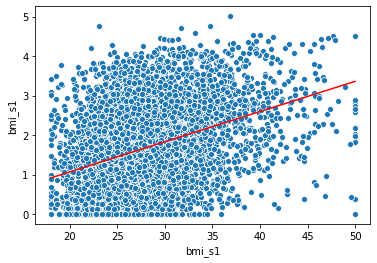

In [14]:
x = dat['bmi_s1']
y = np.log(dat['rdi4p'] + 1)
sns.scatterplot(x, y)
sns.lineplot(x, fit.params[0] + fit.params[1] * x, color = "red")

Predict rdi4p for a person with bmi = 30

In [12]:
np.exp(fit.params[0] + fit.params[1] * 30) - 1

5.243483895030396